**Project Overview:**

The project focuses on **cafe sales data analysis** using Python. The primary goal is to **clean and transform a raw dataset** named dirty_cafe_sales.csv. This involves addressing common data quality issues such as **missing values, incorrect data types, and inconsistent data entries**. The process includes an initial inspection to understand the data's structure and identify problems. Subsequent steps involve using methods like filling missing numerical values with the median and categorical values with the mode, and converting columns to their proper data types (e.g., converting `Transaction Date` to a datetime object). The final outcome is a **clean and reliable dataset** that is ready for further, detailed analysis.

**Aim**
- Provide a practical understanding of Reinforcement Learning principles
- Implement algorithms that enable agents to learn optimal strategies
- Analyze performance improvements through training iterations

**Dataset**
Cafe Dataset

**Four Major Parts**
1. Data Understanding
2. Dta Cleaning
3. Statistical Tests
4. Visualization

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

**DATA UNDERSTANDING**

In [9]:
cafe= pd.read_csv("dirty_cafe_sales.csv")

In [10]:
cafe.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [19]:
cafe.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3.0,4.0,12.0,Cash,In-store,2023-11-07


In [11]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [12]:
cafe.shape

(10000, 8)

In [43]:
cafe.describe()

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date
count,1.000000e+04,10000.000000,10000.00000,10000.00000,10000
mean,5.474016e+06,2.976100,2.95265,8.87795,2023-07-01 23:03:15.840000256
min,1.000555e+06,0.000000,1.00000,1.00000,2023-01-01 00:00:00
25%,3.219544e+06,2.000000,2.00000,4.00000,2023-04-06 00:00:00
50%,5.453098e+06,3.000000,3.00000,8.00000,2023-07-02 00:00:00
75%,7.730994e+06,4.000000,4.00000,12.00000,2023-09-27 00:00:00
max,9.999124e+06,5.000000,5.00000,25.00000,2023-12-31 00:00:00
std,2.596022e+06,1.438866,1.24396,5.86059,NaN


In [14]:
cafe.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

**DATA CLEANING**
- Finding missing values
- Fixing invalid values
- Standardizing values
- Fixing rows and columns

In [17]:
#missing value
cafe.isnull().sum()

Transaction ID         0
Item                 333
Quantity             309
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [18]:
#Whole null values 
cafe.isnull().sum().sum()

6997

In [33]:
cafe['Transaction ID'] = cafe['Transaction ID'].str.replace('TXN_', '', regex=False).astype(int)

In [ ]:
cafe["Quantity"] = pd.to_numeric(cafe["Quantity"].str.replace("ERROR", "0"), errors="coerce")


In [28]:
cafe['Quantity'] = cafe['Quantity'].fillna(cafe['Quantity'].median()).astype(int)

In [25]:
# Convert column to numeric
cafe['Price Per Unit'] = pd.to_numeric(cafe['Price Per Unit'], errors='coerce')
cafe['Price Per Unit'] = cafe['Price Per Unit'].fillna(cafe['Price Per Unit'].median())

In [26]:
# Convert 'Total Spent' to numeric (replace invalid values like 'ERROR' with NaN)
cafe['Total Spent'] = pd.to_numeric(cafe['Total Spent'], errors='coerce')
cafe['Total Spent'] = cafe['Total Spent'].fillna(cafe['Total Spent'].median())

In [27]:
cafe.replace(['ERROR', 'UNKNOWN'], pd.NA, inplace=True)

In [29]:
cafe['Item'] = cafe['Item'].fillna(cafe['Item'].mode()[0])
cafe['Payment Method'] = cafe['Payment Method'].fillna(cafe['Payment Method'].mode()[0])
cafe['Location'] = cafe['Location'].fillna('Unknown')

In [30]:
cafe['Transaction Date'] = pd.to_datetime(cafe['Transaction Date'], errors='coerce')
cafe['Transaction Date'] = cafe['Transaction Date'].fillna(cafe['Transaction Date'].median())

In [55]:
cafe.dtypes

Transaction ID               int32
Item                        object
Quantity                     int32
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

In [45]:
cafe["Quantity"].unique()

array([2, 4, 5, 3, 1, 0])

In [23]:
cafe.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [33]:
cafe.isnull().sum().sum()

0

In [46]:
#unique
cafe.nunique()

Transaction ID      10000
Item                    8
Quantity                6
Price Per Unit          6
Total Spent            17
Payment Method          3
Location                3
Transaction Date      365
dtype: int64

Finding Outliers

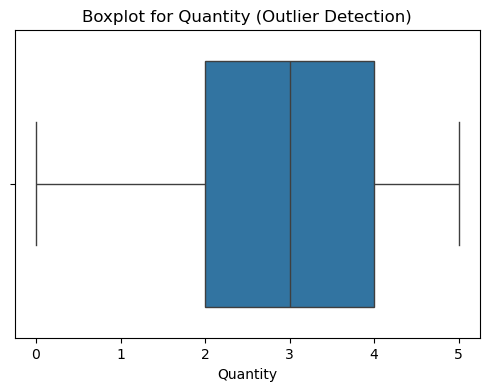

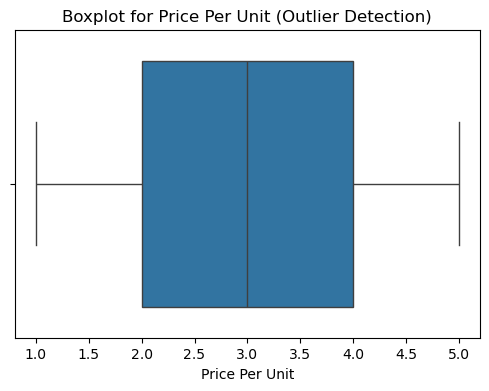

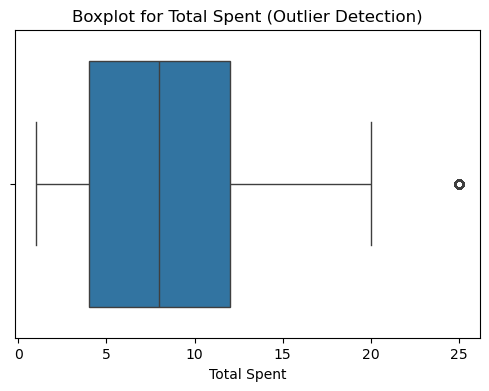

In [37]:
#outliers
numeric_cols=["Quantity","Price Per Unit","Total Spent"]
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cafe[col])
    plt.title(f"Boxplot for {col} (Outlier Detection)")
    plt.show()

In [41]:
Q1 = cafe["Total Spent"].quantile(0.25)
Q3 = cafe["Total Spent"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print("Lower Limit:", lower_limit, "Upper Limit:", upper_limit)
cafe["Total Spent"] = cafe["Total Spent"].clip(lower=lower_limit, upper=upper_limit)
median_val = cafe["Total Spent"].median()#replacing with mean
cafe.loc[(cafe["Total Spent"] > upper_limit) | (cafe["Total Spent"] < lower_limit), ""] = median_val
cafe= cafe[(cafe["Total Spent"] >= lower_limit) & (cafe["Total Spent"] <= upper_limit)]

Lower Limit: 1.5 Upper Limit: 5.5


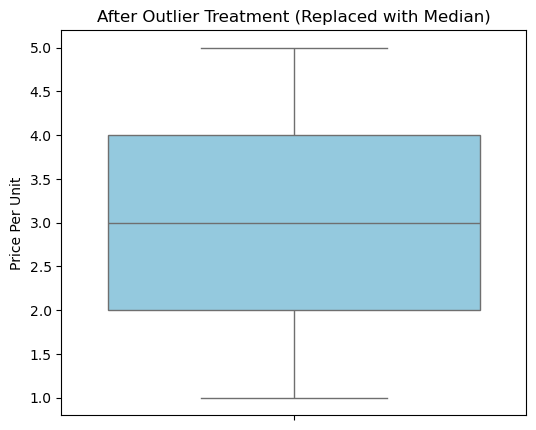

In [47]:
plt.figure(figsize=(6,5))
sns.boxplot(y=cafe["Total Spent"], color="skyblue")
plt.title("After Outlier Treatment (Replaced with Median)")
plt.show()

**Statistical Test**

- Chi-Square Test
- One-Sample T-Test

**Chi-Square Test:**

The Chi-square test checks whether two categorical variables are independent.

- Null hypothesis (H₀): Item and Location are independent.
- Alternative hypothesis (H₁): Item and Location are not independent.

In [69]:
#chisquare 
import pandas as pd
from scipy.stats import chi2_contingency
contingency = pd.crosstab(cafe['Payment Method'], cafe['Location'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-Square Test")
print(f"Chi2 Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")
alpha = 0.05
if p < alpha:
    print("\nReject Null Hypothesis: Payment Method and Location are dependent.")
else:
    print("\nFail to Reject Null Hypothesis: Payment Method and Location are independent.")



Chi-Square Test
Chi2 Statistic: 9.000000000000002
Degrees of Freedom: 6
P-value: 0.17357807091003594

Fail to Reject Null Hypothesis: Payment Method and Location are independent.


In [ ]:
**One-Sample T-Test**


In [70]:
#One-Sample T-Test
import numpy as np
from scipy import stats
quantity = cafe['Quantity'].dropna().astype(float)
mu = 5  
t_stat, p_val = stats.ttest_1samp(quantity, mu)
print("Test 1: One-Sample T-Test on Quantity")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("➡ Reject Null Hypothesis: Average quantity is significantly different from 5.")
else:
    print("➡ Fail to Reject Null Hypothesis: Average quantity is not significantly different from 5.")


Test 1: One-Sample T-Test on Quantity
T-statistic: -3.273268353539886
P-value: 0.022118466722329432
➡ Reject Null Hypothesis: Average quantity is significantly different from 5.


**VISUALIZATION**



**Univariate analysis**

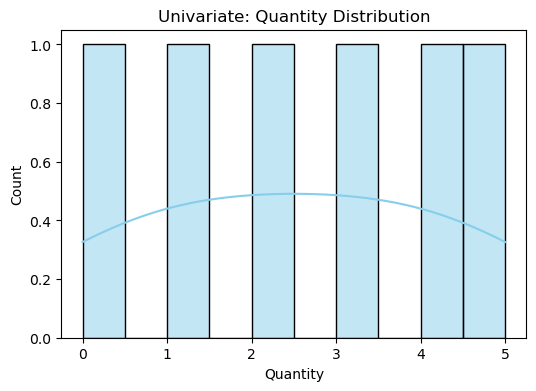

In [45]:
# univariateBivariate
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram for Quantity
plt.figure(figsize=(6,4))
sns.histplot(cafe['Quantity'], bins=10, kde=True, color="skyblue")
plt.title("Univariate: Quantity Distribution")
plt.show()


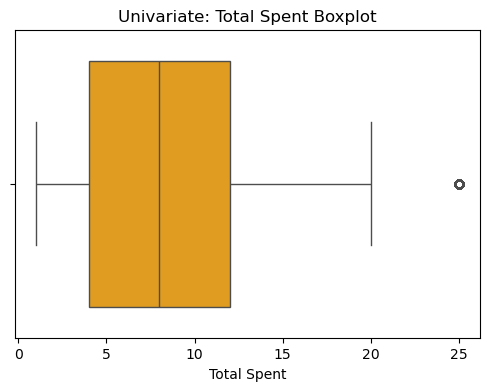

In [41]:
# Boxplot for Total Spent
plt.figure(figsize=(6,4))
sns.boxplot(x=cafe['Total Spent'], color="orange")
plt.title("Univariate: Total Spent Boxplot")
plt.show()

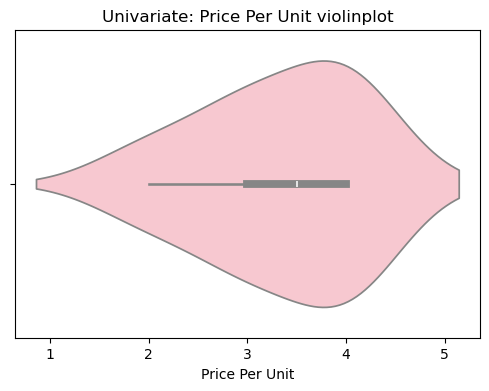

In [59]:
plt.figure(figsize=(6,4))
sns.violinplot(x=cafe['Price Per Unit'], color="pink")
plt.title("Univariate: Price Per Unit violinplot")
plt.show()

**Bivariate**

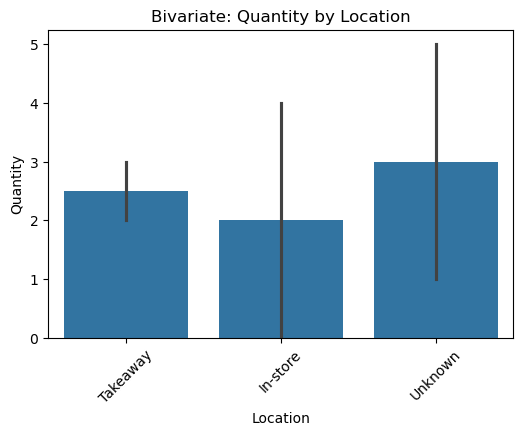

In [66]:
#Bivariate
plt.figure(figsize=(6,4))
sns.barplot(x="Location", y="Quantity", data=cafe)
plt.title("Bivariate: Quantity by Location")
plt.xticks(rotation=45)
plt.show()


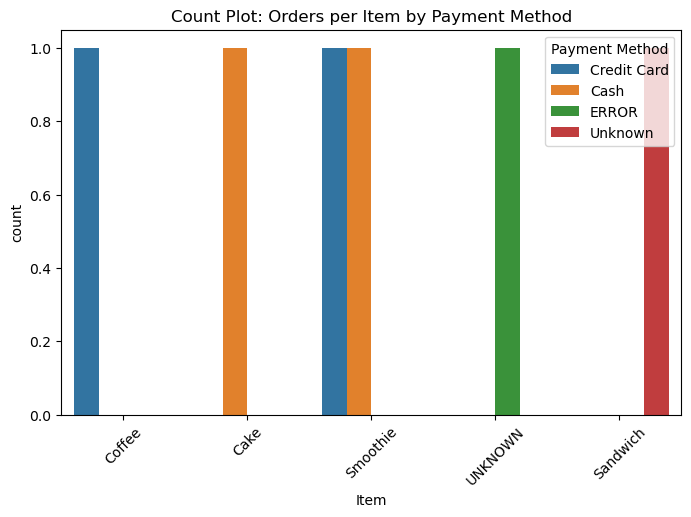

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(x="Item", data=cafe, hue="Payment Method")
plt.title("Count Plot: Orders per Item by Payment Method")
plt.xticks(rotation=45)
plt.show()


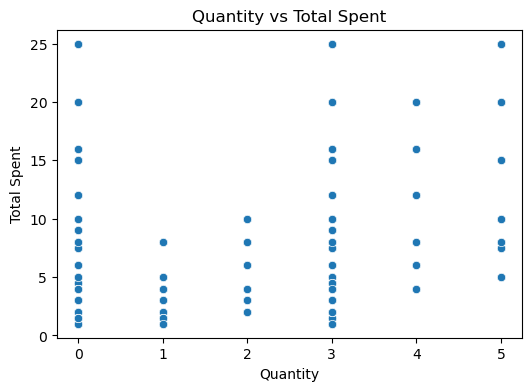

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Quantity", y="Total Spent", data=cafe)
plt.title("Quantity vs Total Spent")
plt.show()

**Multivarite**

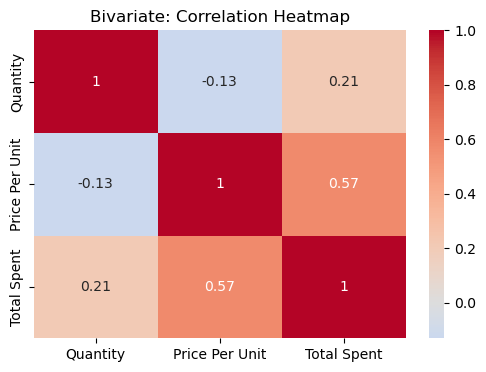

In [48]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cafe[['Quantity','Price Per Unit','Total Spent']].corr(),annot=True, cmap="coolwarm", center=0)
plt.title("Bivariate: Correlation Heatmap")
plt.show()

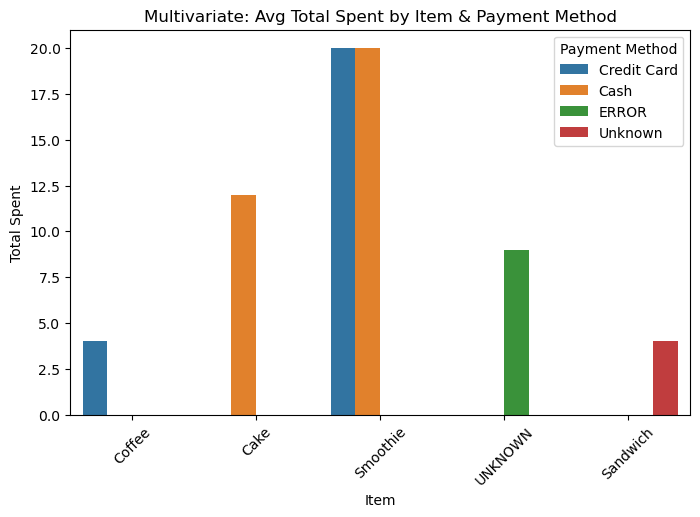

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x="Item", y="Total Spent", hue="Payment Method", data=cafe)
plt.title("Multivariate: Avg Total Spent by Item & Payment Method")
plt.xticks(rotation=45)
plt.show()